This notebook is for running the code in `tiaor.py` for illustrating the use of the stochastic functions.

In [1]:
import tiaor as t

In [7]:
import matplotlib.pyplot as plt

In [2]:
# # Example input data 1

# pairs = ["P1", "P2", "P3", "P4"] 
# altruistic_donors = ["NDD1"]
# nodes = pairs + altruistic_donors
# edges = {("NDD1", "P1"): 2,
#          ("P1", "P2"): 10, 
#          ("P2", "P3"): 10,
#          ("P3", "P4"): 10,
#          ("P4", "P1"): 10
# }

# # Example input data 2

# pairs = ["P1", "P2", "P3", "P4", "P5"] 
# altruistic_donors = ["NDD1"]
# nodes = pairs + altruistic_donors
# edges = {("NDD1", "P1"): 0.1,
#          ("P1", "P2"): 10, 
#          ("P2", "P3"): 9,
#          ("P3", "P4"): 8,
#          ("P4", "P5"): 7,
#          ("P5", "P1"): 6
# }

# Example input data 3

pairs = ["P1", "P2", "P3", "P4", "P5"] 
altruistic_donors = ["NDD1"]
nodes = pairs + altruistic_donors
edges = {("NDD1", "P1"): 0.1,
         ("P1", "P2"): 10, 
         ("P2", "P3"): 9,
         ("P3", "P4"): 8,
         ("P4", "P5"): 7
}

In [10]:
# TESTING THE generate_simple_scenarios FUNCTION
# ----------------------------------------------

scenarios_2 = t.generate_simple_scenarios(pairs, altruistic_donors, edges)
t.ra(pairs, altruistic_donors, edges, noisy=2, scenarios=scenarios_2)

FICO Xpress v9.4.2, Community, solve started 20:21:06, Mar 9, 2025
Heap usage: 427KB (peak 427KB, 151KB system)
Maximizing MILP noname using up to 16 threads and up to 15GB memory, with these control settings:
OUTPUTLOG = 1
NLPPOSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
XSLP_OBJSENSE = -1
Original problem has:
       107 rows           35 cols          155 elements        35 entities
Presolved problem has:
         0 rows            0 cols            0 elements         0 entities
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 424KB (peak 516KB, 151KB system)
Will try to keep branch and bound tree memory usage below 8.7GB
Starting concurrent solve with dual (1 thread)

 Concurrent-Solve,   0s
            Dual        
    objective   dual inf
 D  9.4000000   .0000000
                        
------- optimal --------
Concurrent statistics:
           Dual: 0 simplex iterations, 0.00s
Optimal solution found
 
   Its         Obj Value      S   Ninf  Nneg   Sum Dual Inf  Time


(9.4, [('NDD1', 'P1'), ('P1', 'P2'), ('P2', 'P3'), ('P3', 'P4')])

(array([  2.,   7.,  29., 103., 235., 261., 216., 110.,  28.,   9.]),
 array([17.7505, 18.4726, 19.1947, 19.9168, 20.6389, 21.361 , 22.0831,
        22.8052, 23.5273, 24.2494, 24.9715]),
 <BarContainer object of 10 artists>)

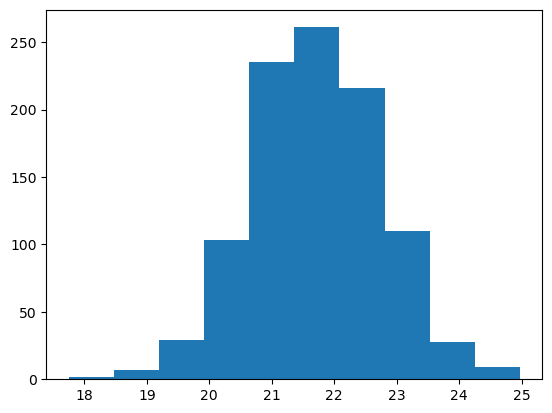

In [ ]:
# TESTING THE generate_probabilistic_scenarios FUNCTION
# -----------------------------------------------------

nb_scenarios = 200
pdp = 0.1 # pair dropout probability
pda = 0.1 # NDD dropout probability

obj_values = []

for i in range(1000):
    scenarios = t.generate_probabilistic_scenarios(pairs,altruistic_donors,edges,nb_scenarios,pdp,pda)
    obj_values.append(t.ra(pairs,altruistic_donors,edges, noisy=0, scenarios=scenarios)[0])

# Plot objective value
fig, ax = plt.subplots()
ax.hist(obj_values)